In [1]:
%load_ext autoreload
%autoreload 2

In [21]:
from pangolin import *
from pangolin.automap import automap, roll
import time

In [12]:
# create large regression model

dims = 100
ndata = 1000

x = makerv(np.random.randn(ndata,dims))
sigma = Truncated(normal_scale,lo=0)(0,1)
t0 = time.time()
w = automap([normal(0,1) for d in range(dims)],False)
t1 = time.time()
y = automap([normal(w @ x[n,:], sigma) for n in range(ndata)],False)
t2 = time.time()
print("times",t1-t0,t2-t1)
#print_upstream(y)

times 0.007739067077636719 0.0808420181274414


In [24]:
def g():
    x = makerv(np.random.randn(ndata,dims))
    sigma = Truncated(normal_scale,lo=0)(0,1)
    w = roll([normal(0,1) for d in range(dims)])
    y = roll([normal(w @ x[n,:], sigma) for n in range(ndata)])
    return y

%timeit g()

def f():
    x = makerv(np.random.randn(ndata,dims))
    sigma = Truncated(normal_scale,lo=0)(0,1)
    w = automap([normal(0,1) for d in range(dims)],False)
    y = automap([normal(w @ x[n,:], sigma) for n in range(ndata)],False)
    return y

%timeit f()


87.8 ms ± 1.72 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
87 ms ± 2.75 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


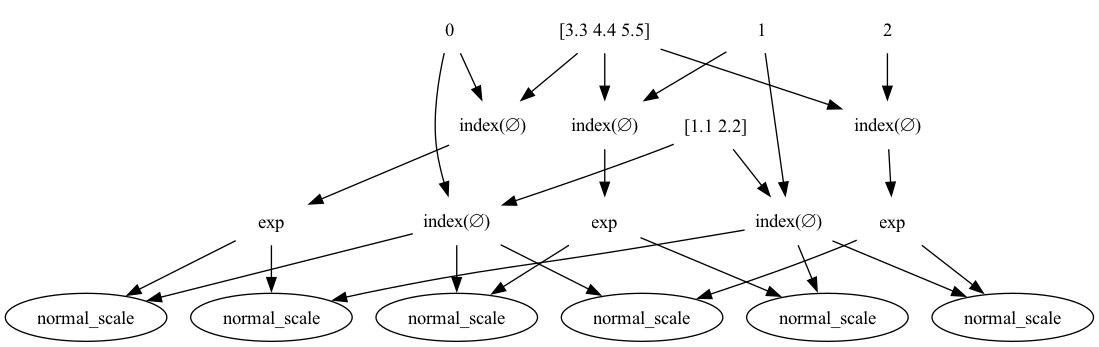

In [10]:
l = makerv([1.1,2.2])
s = makerv([3.3,4.4,5.5])
x = [[normal(l[i],exp(s[j])) for j in range(3)] for i in range(2)]
viz_upstream(x)

In [6]:
viz_upstream(automap(x))

TypeError: automap() missing 1 required positional argument: 'check_validity'

In [ ]:
x = makerv([1,2,3])
y = automap([x[0] for i in range(3)])

In [ ]:
# create large regression model

dims = 1000
ndata = 10000

x = makerv(np.random.randn(ndata,dims))
sigma = Truncated(normal_scale,lo=0)(0,1)
t0 = time.time()
w = automap([normal(0,1) for d in range(dims)],False)
t1 = time.time()
y = automap([normal(w @ x[n,:], sigma) for n in range(ndata)],False)
t2 = time.time()
print("times",t1-t0,t2-t1)
#print_upstream(y)

In [ ]:
x = makerv(np.random.randn(ndata,dims))
sigma = Truncated(normal_scale,lo=0)(0,1)
t0 = time.time()
w = automap([normal(0,1) for d in range(dims)])
t1 = time.time()
y = automap([normal(w @ x[n,:], sigma) for n in range(ndata)])
t2 = time.time()
print("times",t1-t0,t2-t1)
print_upstream(y)

In [ ]:
y.parents[0]

In [ ]:
y.parents[0].parents[0]

In [ ]:
y.parents[0].parents[0].parents

In [ ]:
x = [Truncated(normal_scale,lo=0)(0,1) for i in range(3)]
y = automap([normal(xi,1) for xi in x])
print_upstream(y)

In [ ]:
diag_normal = vmap(normal_scale)
x = automap([diag_normal(np.zeros(2),np.ones(2)) for i in range(3)])
print_upstream(x)

In [ ]:
from pangolin.arrays import ArrayND
x = ArrayND((5,))
for i in range(5):
    x[i] = automap([diag_normal(np.zeros(3),np.ones(3)) for i in range(4)])
print_upstream(x)